# Cheminformatics and RDKit

---

## Table of Contents

- [What is Cheminformatics?](#What-is-Cheminformatics?)
- [RDKit: A Cheminformatics Toolkit](#RDKit:-A-Cheminformatics-Toolkit)
- [Getting Started with RDKit in Python](#Getting-Started-with-RDKit-in-Python)
- [Creating a molecule (RWMOL, not recommended but motivating examples)](#Creating-a-molecule-(RWMOL,-not-recommended-but-motivating-examples))
- [Simplified Molecular Input Line Entry System (SMILES)](#Simplified-Molecular-Input-Line-Entry-System-(SMILES))
- [Export to different formats](#Export-to-different-formats)
- [Load molecule from Molfile](#Load-molecule-from-Molfile)
- [Iterate throught atoms and get properties](#Iterate-throught-atoms-and-get-properties)

## What is Cheminformatics?
---

Cheminformatics is a interdisciplinary field that combines chemistry, computer science, and information technology. It involved the application of computational techiques to handle and analyze chemical data, such as molecular structures, properties, and reactions. 

Cheminformatics plays a crucial role in various areas of chemistry, including drug discovery, material science, and enviromental research. Additionally, cheminformatics provides powerful methods for virtual screening, molecular modeling, and property prediction, accelerating the discovery process and reducing experimental costs. 

## RDKit: A Cheminformatics Toolkit
---

RDKit is a popular open-source cheminformatics toolkit written in C++ and Python. It provides a wide range of functionalities for working with chemical data, including:

1. Reading and writing molecular file formats (e.g. SMILES, MOL, SDF).
2. Substructure searching and molecular fingerprints.
3. 2D and 3D molecular operations (e.g. conformer generation, energy minimization)
4. Descriptor calculation and property prediction
5. Reaction handling and transformation
6. Visualization and depiction of molecules


## Getting Started with RDKit in Python
---

To start using RDKit in Python, you need to install the `rdkit` package. You can install it using `pip` or `conda` pacakge mangers. If you are working from a notebook, here is how you can do it with `pip`:
```Python
!pip install rdkit
```
Once installed, you can import RDKit modules in your Python scripts:

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

Here is a simple example that reads a SMILES string, generates a 2D molecular description, and displays it

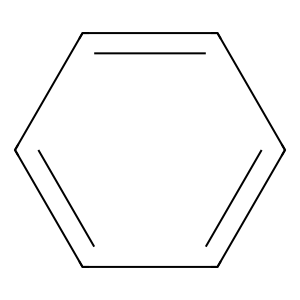

In [2]:
# Read a SMILES string
mol = Chem.MolFromSmiles("c1ccccc1")

# Generate a 2D depiction 
mol_image = Draw.MolToImage(mol)

# Display the image
mol_image

## Creating a molecule (RWMOL, not recommended but motivating examples)
---

Althoug it's not recommended for production code, you can create an ethanol molecule from scratch using RWMol:

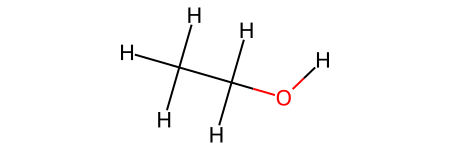

In [3]:
# import rdkit
from rdkit import Chem

# Create an empty molecule
mol = Chem.RWMol()

# Add atoms to the molecule
mol.AddAtom(Chem.Atom(6)) # Carbon atom
mol.AddAtom(Chem.Atom(6)) # Carbon atom
mol.AddAtom(Chem.Atom(8)) # Oxygen atom
mol.AddAtom(Chem.Atom(1)) # Hydrogen atom
mol.AddAtom(Chem.Atom(1)) # Hydrogen atom
mol.AddAtom(Chem.Atom(1)) # Hydrogen atom
mol.AddAtom(Chem.Atom(1)) # Hydrogen atom
mol.AddAtom(Chem.Atom(1)) # Hydrogen atom
mol.AddAtom(Chem.Atom(1)) # Hydrogen atom

# Add bonds between atoms

mol.AddBond(0, 1, Chem.BondType.SINGLE)  # Single bond between two carbon atoms
mol.AddBond(1, 2, Chem.BondType.SINGLE)  # Single bond between carbon and oxygen atoms
mol.AddBond(0, 3, Chem.BondType.SINGLE)  # Single bond between carbon and hydrogen atoms
mol.AddBond(0, 4, Chem.BondType.SINGLE)  # Single bond between carbon and hydrogen atoms
mol.AddBond(0, 5, Chem.BondType.SINGLE)  # Single bond between carbon and hydrogen atoms
mol.AddBond(1, 6, Chem.BondType.SINGLE)  # Single bond between carbon and hydrogen atoms
mol.AddBond(1, 7, Chem.BondType.SINGLE)  # Single bond between carbon and hydrogen atoms
mol.AddBond(2, 8, Chem.BondType.SINGLE)  # Single bond between carbon and hydrogen atoms

mol

Within RDKit, molecules are represented as `mol` objects.

It's generally more convenient to use SMILES or other fiel formats to create `mol` objects. This was just to show you how cubmersome creating molecules from scratch would be. 

## Simplified Molecular Input Line Entry System (SMILES)
---

Simplified Molecular Input Line Entry Systems (SMILES) is a linear notation system (plain text) used to represent molecular sructures in a compact and human-readable form. It is widely used in computational chemistry, cheminformatics, and related fields.

The SMILES notation provides a way to represent the connectivity and structural features of molecules using a linear sequence of characters, symbols, and numbers. It encodes information about the atoms, bonds, rings, aromaticity, and other molecular features in a standardized way. Here are some key features of SMILES:

* **Atom representation**: Atoms are represented by their atomic symbols (e.g. C for carbon, N for nitrogen.)
* **Bond representation**: Bonds represented by symbols indicating their order (sing, dobule `=`, triple `#`, or atomatic).
* **Branching**: Parentheses `()` are used to indicate branching in the molecular structure.
* **Ring notation**: Rings are represented using numbers `1 ... 1` to indicate the atoms involved in the ring.
* **Streochemistry**: Specified notation is used to represent streochemical information, such as chirality `@` and `@@` and double bond configurations `\ .. \` and `/ .. /`.


For further reading on the SMILES notation can be found in the [OpenSMILES speicification](http://opensmiles.org/opensmiles.html) and [Daylight](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html).

Before moving into further coding, let's spend some time to understand why is the SMILES notation so famous?

The key principle behind the design of SMILES were:
1. Simplicity: SMILES was designed to be easy for humans to read and write, as well as for computers to interpret and process.
2. Compactness: SMILES aimed to represent molecular sturctures in a concise and compact form.
3. Compatibility: SMILES was designed to be compatible with existing chemical information systems and databases.

RDKit provides an easy way to create molecules from SMILES strings:

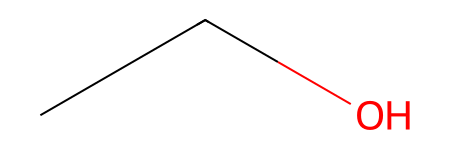

In [4]:
from rdkit import Chem

# Create molecule form SMILES
mol = Chem.MolFromSmiles('CCO')
mol

## Where do I get SMILES for a molecule from 
---

SMILES string can be obtained varios source, such as:
* Chemical datbases (e.g. [PubChem](https://pubchem.ncbi.nlm.nih.gov), [ChEMBL](https://www.ebi.ac.uk/chembl/))
* Molecular drawing softward (e.g. [Chemdraw](https://revvitysignals.com/products/research/chemdraw))

Many online tools and resources are available for converting molecular sturctures to SMILES format.


## Canonicalization
---

It's important to note that the same molecular sturcture can be represented by different SMILES strings. For example, `c1ccccc1`, `C1=CC=CC=C1`, and `c(c1)cccc1` represent the same benzen molecule.

To ensure a unique and consistent represenation of a molecular sturcture, RDKit provides a canonicalization function:

In [5]:
from rdkit import Chem

# Create molecule form SMILES
mol = Chem.MolFromSmiles('C1=CC=CC=C1')

# Get canonical SMILES
canonical_smiles = Chem.MolToSmiles(mol)
canonical_smiles

'c1ccccc1'

## Export to different formats
---

RDKit supports various molecular file formats for input and output. You can export a molecule to different formats using the appropriate writer function:

In [6]:
from rdkit import Chem

# Create molecule form SMILES
mol = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

# Export to different formats
mol_sdf = Chem.MolToMolBlock(mol)
print(mol_sdf)


     RDKit          2D

 14 15  0  0  0  0  0  0  0  0999 V2000
    2.7760    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2760    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943    1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943   -1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7062   -2.6807    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1328   -3.1443    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4086   -3.6844    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8351   -3.2209    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9499   -4.2246    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1470   -1.7537    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5736   -1.2902    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0967   -5.1517    0

And with 3D coordinates:

In [7]:
from rdkit.Chem import AllChem

# add hydrogens
mol = Chem.AddHs(mol)

# generate 3D coordinates
AllChem.EmbedMolecule(mol, AllChem.ETKDG())

# geometry optimization
AllChem.UFFOptimizeMolecule(mol)

# export XYZ
xyz = Chem.MolToXYZBlock(mol)
print(xyz)

# export to SDF format
sdf = Chem.MolToMolBlock(mol)
print(sdf)

# Save the molecule to a file
with open("Data/caffeine_3d.sdf", "w") as file:
    file.write(sdf)

24

C      3.245410    0.707006   -0.321005
N      2.117613   -0.218941   -0.337231
C      2.149296   -1.538630   -0.646284
N      0.927695   -2.130497   -0.589095
C      0.119251   -1.114582   -0.224485
C      0.823732    0.030169   -0.075354
C      0.182356    1.211778    0.272279
O      0.836045    2.284304    0.391100
N     -1.179225    1.178745    0.472387
C     -1.883110    0.000014    0.284383
O     -3.141118   -0.005332    0.404694
N     -1.227829   -1.168705   -0.040454
C     -1.967143   -2.418022   -0.264842
C     -1.900871    2.418263    0.805523
H      4.189484    0.173178   -0.561187
H      3.085233    1.505201   -1.075774
H      3.342072    1.162588    0.686750
H      3.052297   -2.070813   -0.916590
H     -1.312944   -3.305123   -0.126076
H     -2.802662   -2.514594    0.461034
H     -2.375975   -2.427831   -1.297062
H     -2.781762    2.207615    1.448906
H     -2.240595    2.913389   -0.128399
H     -1.257251    3.120819    1.376783


     RDKit          3D

 24 25  0 

## Load molecule from Molfile

---
You can also load molecule from Molfiles, whic are a common file formatfor storing chemical structures:

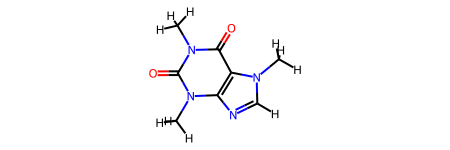

In [8]:
from rdkit import Chem

# Load molecule form Molfile
with open("Data/caffeine_3d.sdf", "r") as molfile:
    mol = Chem.MolFromMolBlock(molfile.read(), removeHs=False)

mol

## Iterate throught atoms and get properties

---
You can iterate through the atoms of a molecuel using RDKit, accessing a wealth of information about each atom. 
    

In [9]:
from rdkit import Chem

caffeine_smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
caffeine_molecule = Chem.MolFromSmiles(caffeine_smiles)

for atom in caffeine_molecule.GetAtoms():
    print(f"Atom: {atom.GetSymbol()}")
    print(f"Atomic Number: {atom.GetAtomicNum()}")
    print(f"Atom Index: {atom.GetIdx()}")
    print(f"Degree (number of neighbors): {atom.GetDegree()}")
    print(f"Valence: {atom.GetTotalValence()}")
    print(f"Hybridization: {atom.GetHybridization()}")
    print(f"----------------------------------------")




Atom: C
Atomic Number: 6
Atom Index: 0
Degree (number of neighbors): 1
Valence: 4
Hybridization: SP3
----------------------------------------
Atom: N
Atomic Number: 7
Atom Index: 1
Degree (number of neighbors): 3
Valence: 3
Hybridization: SP2
----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 2
Degree (number of neighbors): 2
Valence: 4
Hybridization: SP2
----------------------------------------
Atom: N
Atomic Number: 7
Atom Index: 3
Degree (number of neighbors): 2
Valence: 3
Hybridization: SP2
----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 4
Degree (number of neighbors): 3
Valence: 4
Hybridization: SP2
----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 5
Degree (number of neighbors): 3
Valence: 4
Hybridization: SP2
----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 6
Degree (number of neighbors): 3
Valence: 4
Hybridization: SP2
----------------------------------------
Atom: 